# Random Forest
# Machine Learning Model on Social Media Dataset

Random Forest is a versatile machine learning algorithm that can be used for both classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputting the mode or mean prediction of the individual trees. 

***Here's a breakdown of its components and uses:***
1. **Decision Trees**: Random Forest is an ensemble method, meaning it combines multiple models to improve performance. In the case of Random Forest, these individual models are decision trees.
2. **Bootstrap Sampling**: Random Forest uses a technique called bootstrap sampling to create multiple datasets from the original dataset by sampling with replacement. These datasets are then used to train individual decision trees.
3. **Feature Randomness**: In addition to using bootstrap sampling, Random Forest introduces randomness by considering only a subset of features at each split in the decision tree. This helps in reducing correlation among trees and preventing overfitting.
4. **Voting/Averaging**: In classification tasks, Random Forest takes a majority vote from the individual decision trees to make a final prediction. In regression tasks, it takes the average of the predictions from individual trees.
5. **Versatility**: Random Forest can be used for various machine learning tasks such as classification, regression, and even anomaly detection.
6. **Where to Use**: Random Forest is particularly useful in scenarios where you have complex datasets with a large number of features, noisy data, or missing values. It's also robust to overfitting and tends to perform well without much hyperparameter tuning.
7. **Data Requirements**: Random Forest doesn't have strict data requirements compared to some other algorithms. However, like most machine learning algorithms, it benefits from having a sufficient amount of high-quality data. It's important to have a balanced dataset with enough samples for each class (in the case of classification) to prevent bias.

Overall, Random Forest is a powerful algorithm known for its simplicity, scalability, and effectiveness in a wide range of machine learning tasks.

### Import

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [45]:
df = pd.read_csv('D:\\Data Practice JN\\Pre-Processing\\Wrangled Data of Salary_Dataset.csv')
df

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0,32.0,0,Bachelor's,Software Engineer,5.000000,115296.421831
1,1,28.0,1,Master's,Data Analyst,3.000000,65000.000000
2,2,45.0,0,PhD,Software Engineer,8.090834,150000.000000
3,3,36.0,0,Bachelor's,Sales Associate,7.000000,60000.000000
4,4,52.0,0,Master's,Director,8.000000,200000.000000
...,...,...,...,...,...,...,...
6545,6698,49.0,1,PhD,Director of Marketing,20.000000,200000.000000
6546,6699,32.0,0,High School,Sales Associate,3.000000,50000.000000
6547,6700,30.0,1,Bachelor's,Financial Manager,4.000000,55000.000000
6548,6701,46.0,0,Master's,Marketing Manager,14.000000,140000.000000


In [46]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['Job Title'], inplace=True)
df.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,0,Bachelor's,5.000000,115296.421831
1,28.0,1,Master's,3.000000,65000.000000
2,45.0,0,PhD,8.090834,150000.000000
3,36.0,0,Bachelor's,7.000000,60000.000000
4,52.0,0,Master's,8.000000,200000.000000


#### Label Encoding

In [47]:
# Create the DataFrame
data = {'Gender': ['Male', 'Female', 'Male', 'Female', 'Other']}
p1= pd.DataFrame(data)

# Replace 'male' with 1 and 'female' with 2 in the 'Sex' column
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})

# Print the DataFrame to check
print(df)

       Age Gender Education Level  Years of Experience         Salary
0     32.0      0      Bachelor's             5.000000  115296.421831
1     28.0      1        Master's             3.000000   65000.000000
2     45.0      0             PhD             8.090834  150000.000000
3     36.0      0      Bachelor's             7.000000   60000.000000
4     52.0      0        Master's             8.000000  200000.000000
...    ...    ...             ...                  ...            ...
6545  49.0      1             PhD            20.000000  200000.000000
6546  32.0      0     High School             3.000000   50000.000000
6547  30.0      1      Bachelor's             4.000000   55000.000000
6548  46.0      0        Master's            14.000000  140000.000000
6549  26.0      1     High School             1.000000   35000.000000

[6550 rows x 5 columns]


In [48]:
import pandas as pd

# Sample DataFrame 'p1' with the 'Educational Level' column
data = pd.DataFrame({'Education Level': ["Bachelor's", "Master's", "PhD", 'High School']})

# Replace educational levels with numerical values in the 'Educational Level' column of 'p1'
df['Education Level'] = df['Education Level'].replace({"Bachelor's": 0, "Master's": 1, "PhD": 2, 'High School': 3})

# Print the updated DataFrame to check
print(df)

       Age Gender  Education Level  Years of Experience         Salary
0     32.0      0                0             5.000000  115296.421831
1     28.0      1                1             3.000000   65000.000000
2     45.0      0                2             8.090834  150000.000000
3     36.0      0                0             7.000000   60000.000000
4     52.0      0                1             8.000000  200000.000000
...    ...    ...              ...                  ...            ...
6545  49.0      1                2            20.000000  200000.000000
6546  32.0      0                3             3.000000   50000.000000
6547  30.0      1                0             4.000000   55000.000000
6548  46.0      0                1            14.000000  140000.000000
6549  26.0      1                3             1.000000   35000.000000

[6550 rows x 5 columns]


C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_9220\1304883136.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education Level'] = df['Education Level'].replace({"Bachelor's": 0, "Master's": 1, "PhD": 2, 'High School': 3})


## Model Building

#### Define Featues and Label

In [49]:
x= df.iloc[ : ,:-1]
y= df.iloc[ : ,-1:]

In [50]:
x

,Age,Gender,Education Level,Years of Experience
0,32.0,0,0,5.000000
1,28.0,1,1,3.000000
2,45.0,0,2,8.090834
3,36.0,0,0,7.000000
4,52.0,0,1,8.000000
...,...,...,...,...
6545,49.0,1,2,20.000000
6546,32.0,0,3,3.000000
6547,30.0,1,0,4.000000
6548,46.0,0,1,14.000000


In [51]:
y

,Salary
0,115296.421831
1,65000.000000
2,150000.000000
3,60000.000000
4,200000.000000
...,...
6545,200000.000000
6546,50000.000000
6547,55000.000000
6548,140000.000000


#### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [53]:
x_test

,Age,Gender,Education Level,Years of Experience
4660,36.0,0,2,11.0
1363,48.0,0,2,16.0
4032,29.0,1,3,1.0
3779,25.0,1,0,1.0
6269,26.0,0,3,2.0
...,...,...,...,...
562,24.0,0,0,1.0
95,39.0,1,0,12.0
3554,34.0,1,0,6.0
1050,28.0,1,0,5.0


In [54]:
x_train

,Age,Gender,Education Level,Years of Experience
3679,33.0,1,0,6.0
4908,26.0,0,0,5.0
3559,25.0,1,0,1.0
5723,39.0,1,0,16.0
2111,27.0,0,0,3.0
...,...,...,...,...
4931,25.0,1,0,3.0
3264,34.0,0,0,3.0
1653,43.0,0,2,13.0
2607,24.0,1,0,2.0


In [55]:
y_test

,Salary
4660,135000.0
1363,190000.0
4032,26000.0
3779,35000.0
6269,40000.0
...,...
562,90000.0
95,65000.0
3554,75000.0
1050,150000.0


In [56]:
y_train

,Salary
3679,75000.0
4908,85000.0
3559,35000.0
5723,200000.0
2111,80000.0
...,...
4931,65000.0
3264,50000.0
1653,185000.0
2607,55000.0


#### Model Fitting

In [57]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

#### Prediction

In [59]:
model.predict([[40, 0, 2, 12]])

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([159841.66666667])

In [60]:
model.predict([[40, 1, 2, 12]])

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([160000.])

In [61]:
model.predict([[40, 2, 2, 12]])

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([160000.])

In [62]:
model.predict([[40, 0, 2, 10]])

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([103643.93483709])

In [63]:
model.predict([[50, 1, 3, 22]])

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([170931.58])

#### Evaluation of Model

In [64]:
print('Training Score of Model =',model.score(x_train, y_train))
print('Testing Score of Model = ',model.score(x_test, y_test))

Training Score of Model = 0.9309635791883686
Testing Score of Model =  0.9155595501529008


## Plot for the Model

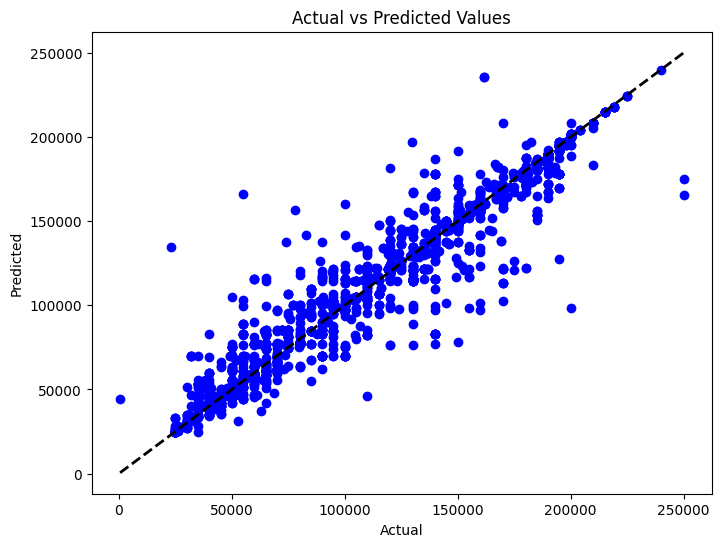

In [67]:
import matplotlib.pyplot as plt

# Assuming you already have your trained model named rf_regressor and test data X_test and y_test
# X_test: Test features
# y_test: Actual target values for test data

# Make predictions on test data
y_pred = model.predict(x_test)

# Plot actual versus predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()
